# L9.3.1 Multilayer Perceptron

# 1) Inspecting the Dataset

In [31]:
import matplotlib.pyplot as plt
from PIL import Image

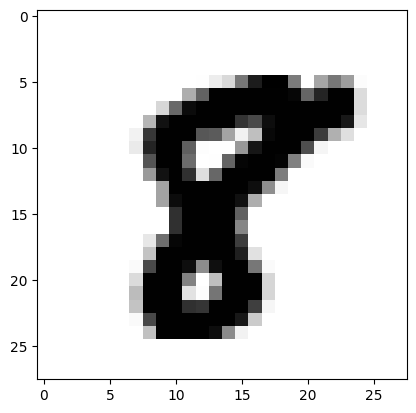

In [32]:
im = Image.open("mnist_train/1.png")
plt.imshow(im, cmap='binary')

In [33]:
import numpy as np
im_array = np.array(im)
print('Array Dimensions', im_array.shape)
print()
print(im_array)

Array Dimensions (28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1  18  38 136 227 255
  254 132   0  90 136  98   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  82 156 253 253 253 253 253
  253 249 154 219 253 253  35   0   0   0]
 [  0   0   0   0   0   0   0   0   0  40 150 244 253 253 253 253 253 253
  253 253 253 253 253 253  35   0   0   0]
 [  0   0   0   0   0   0   0   0  74

In [34]:
import pandas as pd

In [35]:
df_train = pd.read_csv('mnist_train.csv')
print(df_train.shape)
df_train.head()

(256, 2)


,Class Label,File Name
0,5,0.png
1,8,1.png
2,8,2.png
3,0,3.png
4,9,4.png


In [36]:
df_valid = pd.read_csv('mnist_valid.csv')
print(df_valid.shape)
df_valid.head()

(256, 2)


,Class Label,File Name
0,0,256.png
1,8,257.png
2,7,258.png
3,4,259.png
4,7,260.png


In [37]:
df_test = pd.read_csv('mnist_test.csv')
print(df_test.shape)
df_test.head()

(256, 2)


,Class Label,File Name
0,4,512.png
1,0,513.png
2,6,514.png
3,8,515.png
4,4,516.png


# 2) Custom Dataset Class

In [38]:
import torch
from PIL import Image
from torch.utils.data import Dataset
import os

In [39]:
class MyDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.img_names = df['File Name']
        self.y = df['Class Label']
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.img_dir, self.img_names[index]))
        if self.transform is not None:
            img = self.transform(img)

        label = self.y[index]
        return img, label
    
    def __len__(self):
        return self.y.shape[0]

# 3) Custom Dataloader

In [40]:
from torchvision import transforms
from torch.utils.data import DataLoader

# Note that transforms.ToTensor()
# already divides pixels by 255. internally

custom_transform = transforms.Compose([#transforms.Lambda(lambda x: x/255.), # not necessary
                                       transforms.ToTensor()
                                      ])

train_dataset = MyDataset(csv_path='mnist_train.csv', 
                          img_dir='mnist_train',
                          transform=custom_transform)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=32,
                          drop_last=True,
                          shuffle=True, # want to shuffle the dataset
                          num_workers=0) # number processes/CPUs to use

In [41]:
valid_dataset = MyDataset(csv_path='mnist_valid.csv',
                          img_dir='mnist_valid',
                          transform=custom_transform)

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=100,
                          shuffle=False,
                          num_workers=0)

test_dataset = MyDataset(csv_path='mnist_test.csv',
                          img_dir='mnist_test',
                          transform=custom_transform)

test_loader = DataLoader(dataset=test_dataset,
                          batch_size=100,
                          shuffle=False,
                          num_workers=0)

# 4) Iterating Through the Dataset

In [42]:
device = torch.device("Cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)

num_epochs = 2
for epoch in range(num_epochs):
    for batch_idx, (x, y) in enumerate(train_loader):
        print('Epoch:', epoch+1, end='')
        print(' | Batch index:', batch_idx, end='')
        print(' | Batch size:', y.size()[0])

        x = x.to(device)
        y = y.to(device)

Epoch: 1 | Batch index: 0 | Batch size: 32
Epoch: 1 | Batch index: 1 | Batch size: 32
Epoch: 1 | Batch index: 2 | Batch size: 32
Epoch: 1 | Batch index: 3 | Batch size: 32
Epoch: 1 | Batch index: 4 | Batch size: 32
Epoch: 1 | Batch index: 5 | Batch size: 32
Epoch: 1 | Batch index: 6 | Batch size: 32
Epoch: 1 | Batch index: 7 | Batch size: 32
Epoch: 2 | Batch index: 0 | Batch size: 32
Epoch: 2 | Batch index: 1 | Batch size: 32
Epoch: 2 | Batch index: 2 | Batch size: 32
Epoch: 2 | Batch index: 3 | Batch size: 32
Epoch: 2 | Batch index: 4 | Batch size: 32
Epoch: 2 | Batch index: 5 | Batch size: 32
Epoch: 2 | Batch index: 6 | Batch size: 32
Epoch: 2 | Batch index: 7 | Batch size: 32


In [43]:
print(x.shape)

torch.Size([32, 1, 28, 28])


In [44]:
x_images_as_vector = x.view(-1, 28*28)
print(x_images_as_vector.shape)

torch.Size([32, 784])


In [45]:
# x

# Train Model: MLP with Custom Data Loader


## Imports

In [46]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples
from helper_dataset import get_dataloaders

## Settings and Dataset

In [48]:

##########################
### SETTINGS
##########################
RANDOM_SEED = 1
BATCH_SIZE = 64
NUM_EPOCHS = 100
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [49]:
set_all_seeds(RANDOM_SEED)
set_deterministic()

In [50]:
##########################
### MNIST DATASET
##########################
train_loader, valid_loader, test_loader = get_dataloaders(batch_size=BATCH_SIZE)

# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([64, 1, 28, 28])
Image label dimensions: torch.Size([64])
Class labels of 10 examples: tensor([1, 7, 3, 8, 2, 6, 6, 2, 4, 9])


## Model

In [51]:
class MLP(torch.nn.Module):

    def __init__(self, num_features, num_hidden, num_classes):
        super().__init__()
        self.num_classes = num_classes
        self.model = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden),
            torch.nn.Sigmoid(),
            torch.nn.Linear(num_hidden, num_classes)
        )

    def forward(self, x):
        return self.model(x)
    
#################################
### Model Initialization
#################################

torch.manual_seed(RANDOM_SEED)
model = MLP(num_features=28*28,
            num_hidden=100,
            num_classes=10)

model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

## Training

In [52]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE
)

Epoch: 001/100 | Batch 0000/0004 | Loss: 2.3783
Epoch: 001/100 | Train: 13.67% | Validation: 7.81%
Time elapsed: 0.00 min
Epoch: 002/100 | Batch 0000/0004 | Loss: 2.2727
Epoch: 002/100 | Train: 14.06% | Validation: 10.16%
Time elapsed: 0.00 min
Epoch: 003/100 | Batch 0000/0004 | Loss: 2.2464
Epoch: 003/100 | Train: 19.53% | Validation: 11.33%
Time elapsed: 0.00 min
Epoch: 004/100 | Batch 0000/0004 | Loss: 2.2146
Epoch: 004/100 | Train: 13.67% | Validation: 7.81%
Time elapsed: 0.00 min
Epoch: 005/100 | Batch 0000/0004 | Loss: 2.2051
Epoch: 005/100 | Train: 14.84% | Validation: 10.94%
Time elapsed: 0.00 min
Epoch: 006/100 | Batch 0000/0004 | Loss: 2.2037
Epoch: 006/100 | Train: 22.27% | Validation: 14.45%
Time elapsed: 0.00 min
Epoch: 007/100 | Batch 0000/0004 | Loss: 2.2299
Epoch: 007/100 | Train: 35.94% | Validation: 26.56%
Time elapsed: 0.00 min
Epoch: 008/100 | Batch 0000/0004 | Loss: 2.2000
Epoch: 008/100 | Train: 27.73% | Validation: 16.80%
Time elapsed: 0.01 min
Epoch: 009/100 | B

## Evaluate

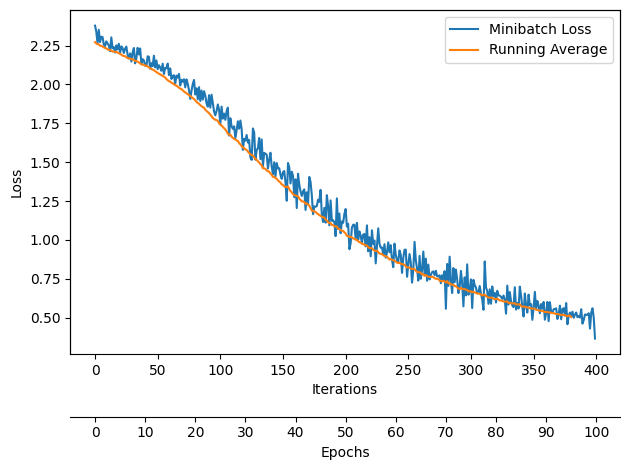

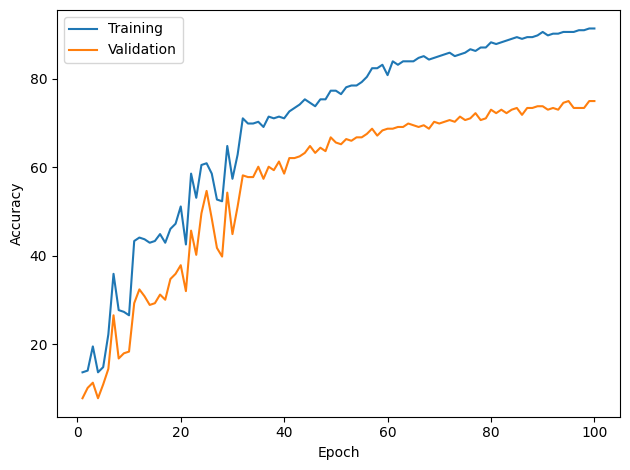

In [53]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.show()

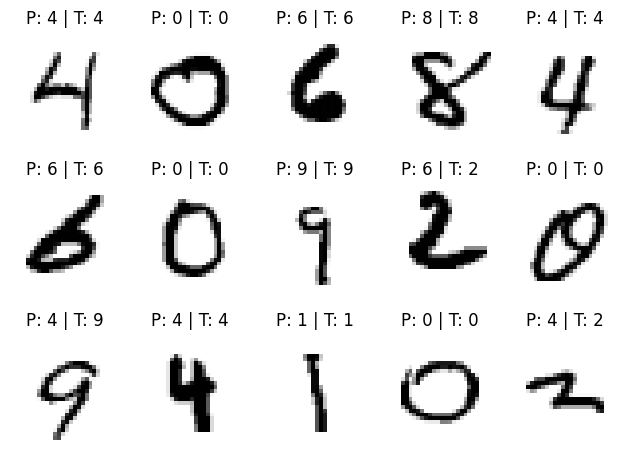

In [54]:
show_examples(model=model, data_loader=test_loader)